In [2]:
import pandas as pd
penguins_df = pd.read_csv('/content/penguins_size.csv')
print(penguins_df.head())

  species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torgersen              36.7             19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE  


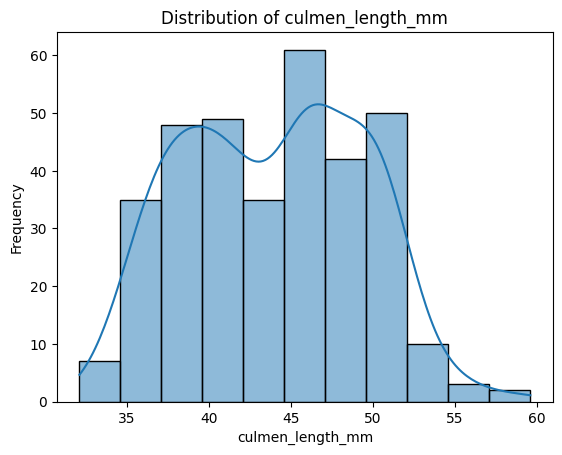

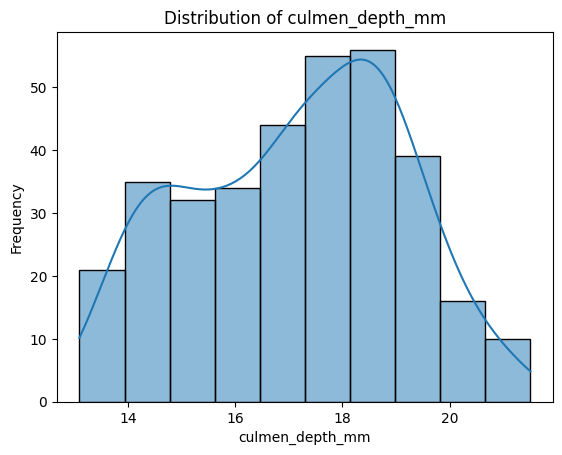

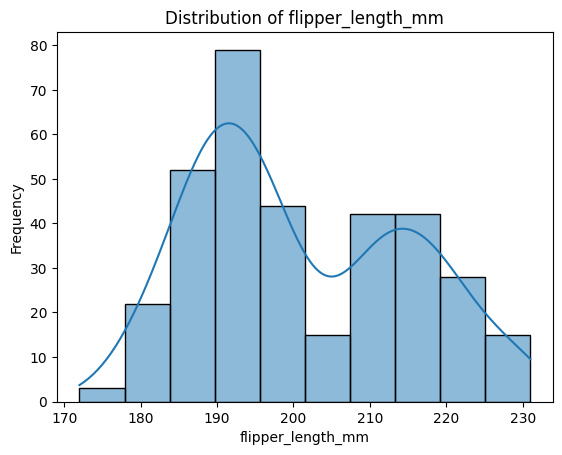

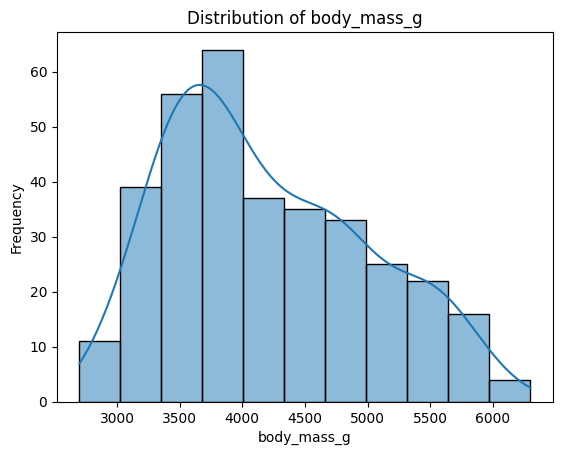

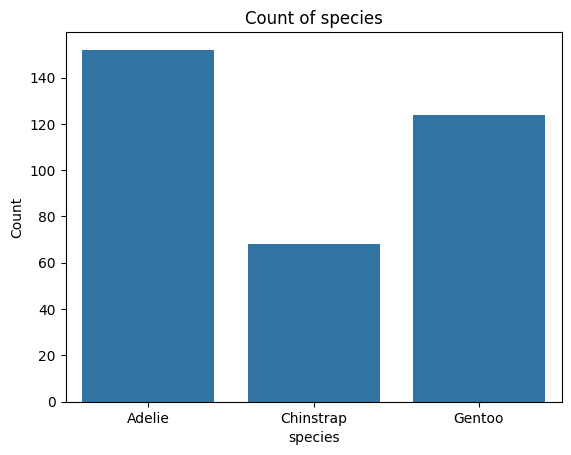

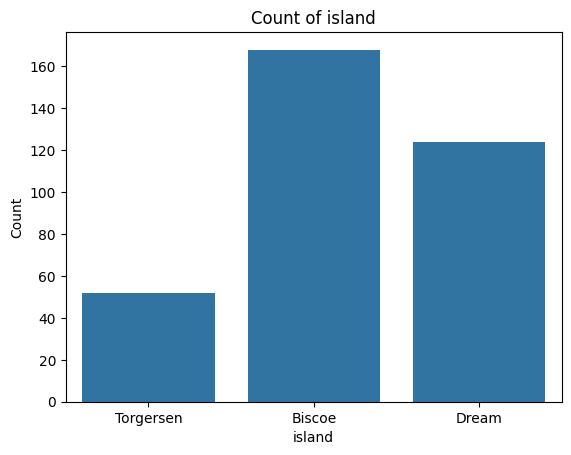

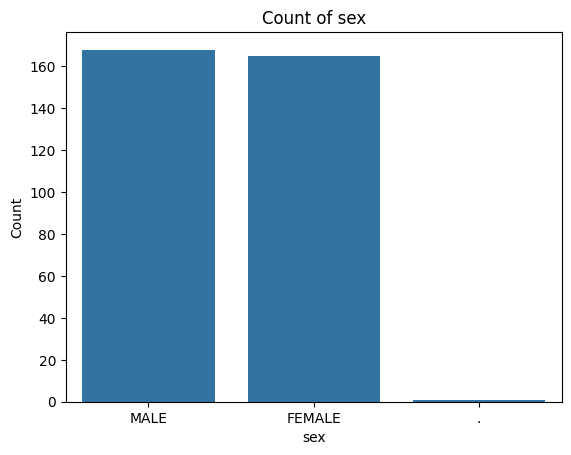

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate Analysis
# Plot distributions of numeric variables
numeric_vars = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
for var in numeric_vars:
    sns.histplot(penguins_df[var], kde=True)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

# Plot count of categorical variables
categorical_vars = ['species', 'island', 'sex']
for var in categorical_vars:
    sns.countplot(data=penguins_df, x=var)
    plt.title(f'Count of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.show()


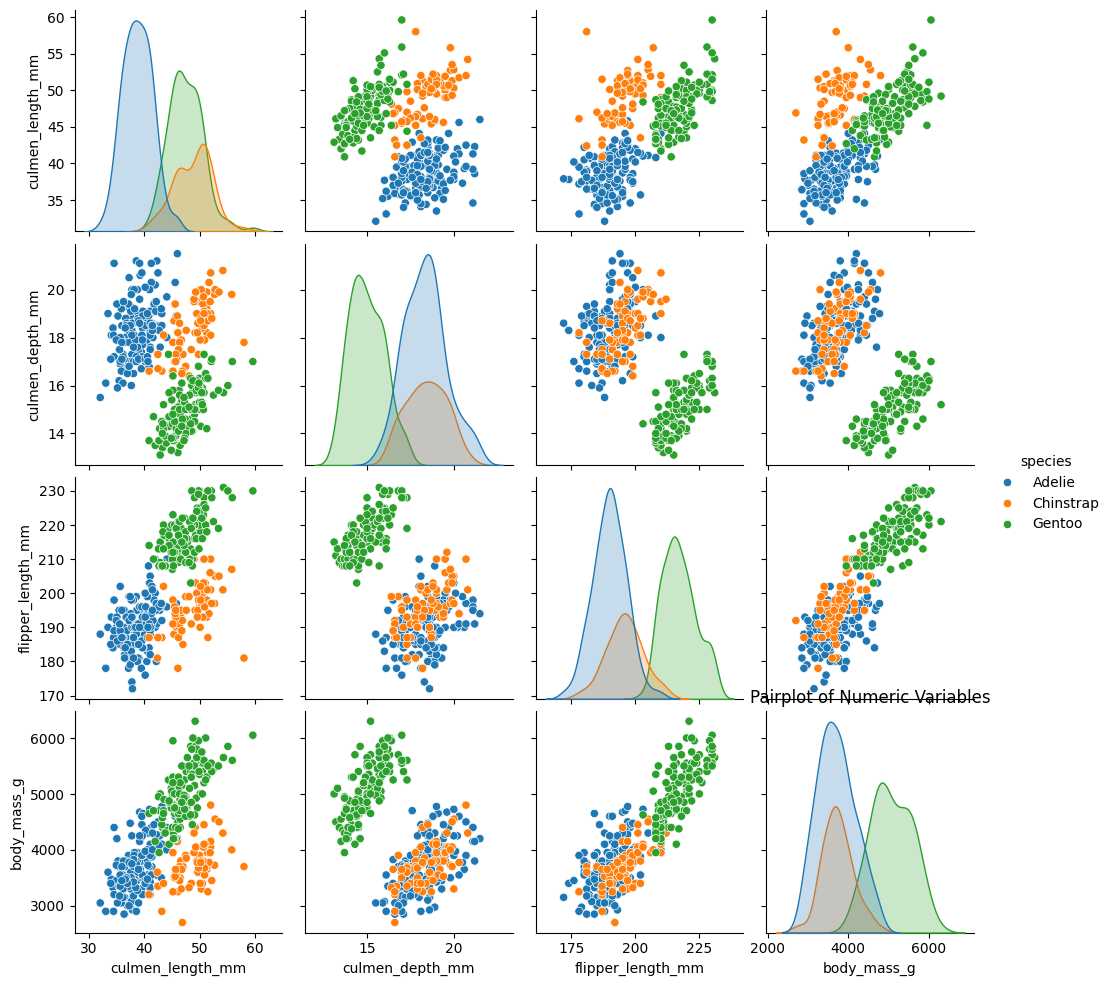

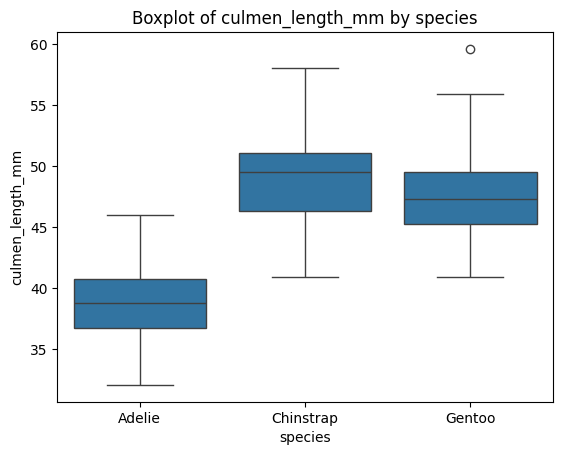

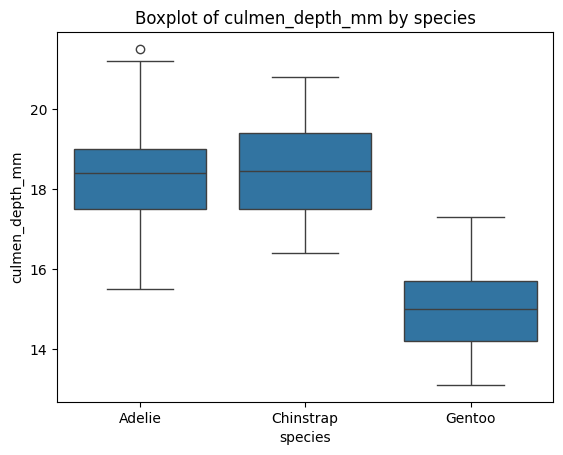

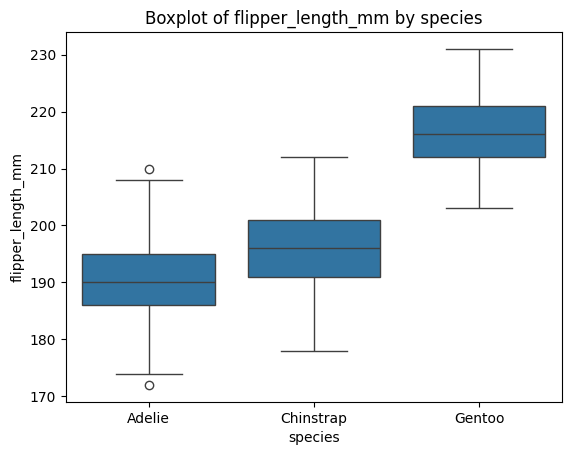

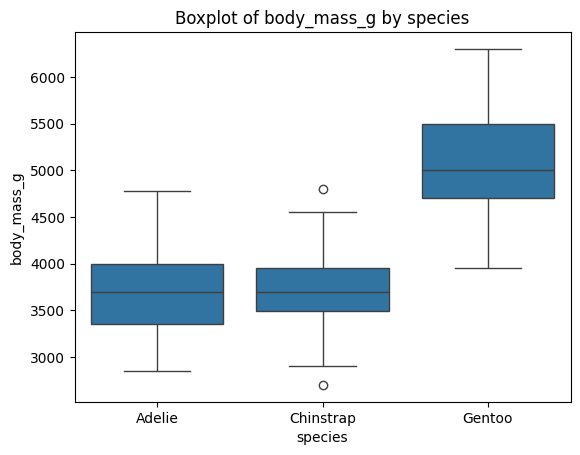

In [5]:
# Bi-Variate Analysis
# Pairplot for numeric variables
sns.pairplot(penguins_df, hue='species')
plt.title('Pairplot of Numeric Variables')
plt.show()

# Boxplot for numeric variables by Species
for var in numeric_vars:
    sns.boxplot(data=penguins_df, x='species', y=var)
    plt.title(f'Boxplot of {var} by species')
    plt.xlabel('species')
    plt.ylabel(var)
    plt.show()


<ipython-input-6-c7130db9f29b>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = penguins_df.corr()


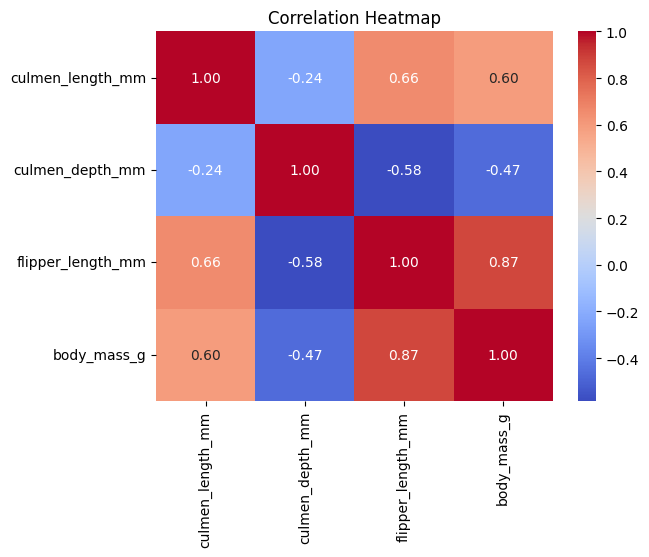

In [6]:
# Multi-Variate Analysis
# Correlation heatmap
correlation_matrix = penguins_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [7]:
print(penguins_df.describe())


       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        342.000000       342.000000         342.000000   342.000000
mean          43.921930        17.151170         200.915205  4201.754386
std            5.459584         1.974793          14.061714   801.954536
min           32.100000        13.100000         172.000000  2700.000000
25%           39.225000        15.600000         190.000000  3550.000000
50%           44.450000        17.300000         197.000000  4050.000000
75%           48.500000        18.700000         213.000000  4750.000000
max           59.600000        21.500000         231.000000  6300.000000


In [8]:
print(penguins_df.isnull().sum())

# Deal with missing values (if any)
# For this example, we'll simply drop rows with missing values
penguins_df.dropna(inplace=True)

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64


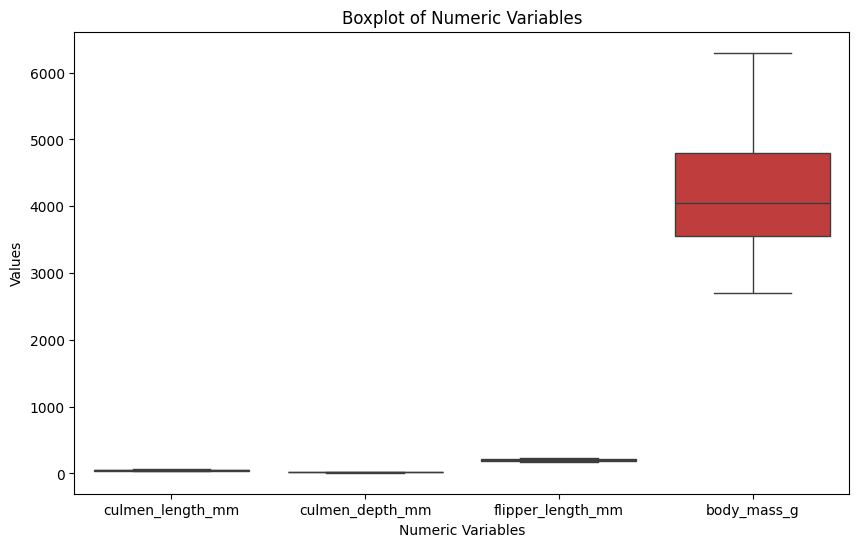

In [9]:
# Outlier Detection and Treatment
# Boxplot to visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=penguins_df[numeric_vars])
plt.title('Boxplot of Numeric Variables')
plt.xlabel('Numeric Variables')
plt.ylabel('Values')
plt.show()

In [10]:
# Categorical Column Encoding
# Perform one-hot encoding for categorical variables
penguins_df = pd.get_dummies(penguins_df, columns=['species', 'island', 'sex'], drop_first=True)


In [11]:
# Splitting Data into Dependent and Independent Variables
X = penguins_df.drop('species_Gentoo', axis=1)  # Independent variables
y = penguins_df['species_Gentoo']  # Dependent variabl

In [12]:
from sklearn.preprocessing import StandardScaler

# Perform feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
model = LogisticRegression()

In [15]:
model.fit(X_train, y_train)


LogisticRegression()

In [16]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predictions on the testing data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67


Confusion Matrix:
[[44  0]
 [ 0 23]]


In [17]:
# Testing with random observations
import numpy as np

# Select random indices from the test set
random_indices = np.random.choice(X_test.shape[0], 5, replace=False)
random_X_test = X_test[random_indices]
random_y_test = y_test.iloc[random_indices]

# Predictions on random observations
random_predictions = model.predict(random_X_test)

# Display actual vs. predicted values
for i in range(len(random_indices)):
    print("Actual:", random_y_test.iloc[i], "\tPredicted:", random_predictions[i])


Actual: 0 	Predicted: 0
Actual: 0 	Predicted: 0
Actual: 0 	Predicted: 0
Actual: 1 	Predicted: 1
Actual: 1 	Predicted: 1


In [18]:
# Define a dictionary to map numeric values to string representations
species_mapping = {0: 'Adélie', 1: 'Chinstrap', 2: 'Gentoo'}

# Convert numeric predicted values to string representations
predicted_species = [species_mapping[value] for value in random_predictions]

# Convert numeric original values to string representations
actual_species = [species_mapping[value] for value in random_y_test]

# Display actual vs. predicted string values
for i in range(len(random_indices)):
    print("Actual:", actual_species[i], "\tPredicted:", predicted_species[i])


Actual: Adélie 	Predicted: Adélie
Actual: Adélie 	Predicted: Adélie
Actual: Adélie 	Predicted: Adélie
Actual: Chinstrap 	Predicted: Chinstrap
Actual: Chinstrap 	Predicted: Chinstrap
